In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from pickle import dump

zero_crossings_mean=[]
zero_crossings_var = []
y_perc_mean=[] 
y_perc_var=[]
y_harm_mean=[] 
y_harm_var=[]
spectral_centroids_mean=[] 
spectral_centroids_var=[]
spectral_rolloff_mean=[]
spectral_rolloff_var=[]
chromagram_mean=[]
chromagram_var=[]
mfcc_mean=[]
mfcc_var=[]
labels= []
# for i in range(1,21):
#     globals()[f'mfcc{i}_mean']=[]
#     globals()[f'mfcc{i}_var']=[]    


def AudioFeatures(music):
    # Zero-crdssing
    wav, sr = librosa.load(f'./음악/{music}')
#     wav, sr = librosa.load(f'./Data/genres_original/classical/classical.00000.wav')
    
    zero_crossings = librosa.zero_crossings(wav, pad=False)
    zero_crossings_mean.append(zero_crossings.mean())
    zero_crossings_var.append(zero_crossings.var())

    #Harmonics and Perceptrual
    y_harm, y_perc = librosa.effects.hpss(wav)
    y_harm_mean.append(y_harm.mean())
    y_harm_var.append(y_harm.var())
    y_perc_mean.append(y_perc.mean())
    y_perc_var.append(y_perc.var())


    #Spectral Centroid / Rolloff
    spectral_centroids = librosa.feature.spectral_centroid(wav, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(wav, sr=sr)[0]

    spectral_centroids_mean.append(spectral_centroids.mean())
    spectral_centroids_var.append(spectral_centroids.var())
    spectral_rolloff_mean.append(spectral_rolloff.mean())
    spectral_rolloff_var.append(spectral_rolloff.var())

    #Mel-Frequency Cepstral Coefficients
    mfccs = librosa.feature.mfcc(wav, sr=sr)
#     mfccs1 = librosa.feature.delta(mfccs, order=2)
    mfcc_mean.append(mfccs.mean())
    mfcc_var.append(mfccs.var())
#     for i in range(1,21):
#         globals()[f'mfcc{i}_mean'].append(mfccs[i-1].mean())
#         globals()[f'mfcc{i}_var'].append(mfccs[i-1].var())
        

    #Chroma Frequencies
    hop_length = 5000
    chromagram = librosa.feature.chroma_stft(wav, sr=sr, hop_length=hop_length)
    chromagram_mean.append(chromagram.mean())
    chromagram_var.append(chromagram.var())

    #Label
    labels.append(music.split('.')[0])
    

In [4]:
musics = list(os.listdir('./음악/'))
for i in musics:
    AudioFeatures(i)

In [5]:
music_df = {"zero_crossings_mean": zero_crossings_mean,"zero_crossings_var": zero_crossings_var ,"y_perc_mean": y_perc_mean, 
         "y_perc_var": y_perc_var, "y_harm_mean":y_harm_mean,"y_harm_var" : y_harm_var,"spectral_centroids_mean" : spectral_centroids_mean,
         "spectral_centroids_var" : spectral_centroids_var,"spectral_rolloff_mean" :spectral_rolloff_mean,"spectral_rolloff_var" : spectral_rolloff_var,
         "chromagram_mean" :chromagram_mean, "chromagram_var" :chromagram_var ,"mfcc_mean" :mfcc_mean, "mfcc_var" : mfcc_var, "labels" : labels
        }

df = pd.DataFrame(music_df)

In [124]:
df

,zero_crossings_mean,zero_crossings_var,y_perc_mean,y_perc_var,y_harm_mean,y_harm_var,spectral_centroids_mean,spectral_centroids_var,spectral_rolloff_mean,spectral_rolloff_var,chromagram_mean,chromagram_var,mfcc_mean,mfcc_var,labels
0,0.083154,0.076240,0.000008,0.005698,-4.529726e-05,0.008172,1784.165850,129774.064525,3805.839606,9.015054e+05,0.353222,0.088184,0.000472,2.480879,blues
1,0.056119,0.052969,-0.000178,0.003063,1.395807e-04,0.005099,1530.176679,375850.073649,3550.522098,2.977893e+06,0.327459,0.096683,-0.004463,4.128235,blues
2,0.076403,0.070566,-0.000019,0.007458,2.105590e-06,0.016342,1552.811865,156467.643368,3042.260232,7.840345e+05,0.365843,0.087874,-0.000213,4.016209,blues
3,0.033359,0.032246,-0.000014,0.002712,4.583482e-07,0.019054,1070.106615,184355.942417,2184.745799,1.493194e+06,0.425257,0.094845,-0.000372,3.339400,blues
4,0.101580,0.091261,-0.000010,0.003094,-1.756130e-05,0.004814,1835.004266,343399.939274,3579.757627,1.572978e+06,0.304230,0.087389,-0.002041,3.733680,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.089339,0.081358,-0.000012,0.000681,1.926834e-06,0.004594,2008.149458,282174.689224,4253.557033,1.222421e+06,0.349288,0.081401,0.001728,1.818864,rock
496,0.097820,0.088252,-0.000012,0.000818,-1.406133e-06,0.003981,2006.843354,182114.709510,4149.338328,1.046621e+06,0.393038,0.074495,0.001474,1.330446,rock
497,0.122012,0.107125,-0.000014,0.001124,-4.881535e-07,0.003825,2077.526598,231657.968040,4031.405321,8.042154e+05,0.429476,0.074665,0.000433,1.331412,rock
498,0.048795,0.046414,-0.000013,0.000653,7.986587e-07,0.006077,1398.699344,240318.731073,3015.631004,1.332712e+06,0.365956,0.093837,-0.000112,1.571918,rock


In [125]:
df.to_csv('wav14.csv', index=False )

In [2]:
df = pd.read_csv('wav14mfcc.csv')

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [13]:
label_index = dict()
index_label = dict()
for i, x in enumerate(df.labels.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
df.labels = [label_index[l] for l in df.labels]

{'blues': 0, 'country': 1, 'disco': 2, 'reggae': 3, 'rock': 4}


In [7]:
X

,zero_crossings_mean,zero_crossings_var,y_perc_mean,y_perc_var,y_harm_mean,y_harm_var,spectral_centroids_mean,spectral_centroids_var,spectral_rolloff_mean,spectral_rolloff_var,chromagram_mean,chromagram_var,mfcc_mean,mfcc_var
0,0.083154,0.076240,0.000008,0.005698,-4.529726e-05,0.008172,1784.165850,129774.064525,3805.839606,9.015054e+05,0.353222,0.088184,1.938016,1767.0273
1,0.056119,0.052969,-0.000178,0.003063,1.395807e-04,0.005099,1530.176679,375850.073649,3550.522098,2.977893e+06,0.327459,0.096683,-0.055611,3605.8938
2,0.076403,0.070566,-0.000019,0.007458,2.105590e-06,0.016342,1552.811865,156467.643368,3042.260232,7.840345e+05,0.365843,0.087874,1.034163,1855.6311
3,0.033359,0.032246,-0.000014,0.002712,4.583482e-07,0.019054,1070.106615,184355.942417,2184.745799,1.493194e+06,0.425257,0.094845,0.071344,3563.6377
4,0.101580,0.091261,-0.000010,0.003094,-1.756130e-05,0.004814,1835.004266,343399.939274,3579.757627,1.572978e+06,0.304230,0.087389,-8.458840,2631.5613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.089339,0.081358,-0.000012,0.000681,1.926834e-06,0.004594,2008.149458,282174.689224,4253.557033,1.222421e+06,0.349288,0.081401,-1.724619,2321.7890
496,0.097820,0.088252,-0.000012,0.000818,-1.406133e-06,0.003981,2006.843354,182114.709510,4149.338328,1.046621e+06,0.393038,0.074495,-1.761153,2227.2012
497,0.122012,0.107125,-0.000014,0.001124,-4.881535e-07,0.003825,2077.526598,231657.968040,4031.405321,8.042154e+05,0.429476,0.074665,-2.664266,1999.0215
498,0.048795,0.046414,-0.000013,0.000653,7.986587e-07,0.006077,1398.699344,240318.731073,3015.631004,1.332712e+06,0.365956,0.093837,-2.238330,4192.9960


In [4]:
X = df.loc[:, df.columns != 'labels']

In [5]:
X = X.loc[:, X.columns != 'Unnamed: 0']

In [6]:
X .columns

Index(['zero_crossings_mean', 'zero_crossings_var', 'y_perc_mean',
       'y_perc_var', 'y_harm_mean', 'y_harm_var', 'spectral_centroids_mean',
       'spectral_centroids_var', 'spectral_rolloff_mean',
       'spectral_rolloff_var', 'chromagram_mean', 'chromagram_var',
       'mfcc_mean', 'mfcc_var'],
      dtype='object')

In [14]:
y = df['labels']
# X = df.loc[:, df.columns != 'labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)

# new data frame with the new scaled data. 
XScaled = pd.DataFrame(np_scaled, columns = cols)
TestScaled = min_max_scaler.transform(X_test)
TestScaled = pd.DataFrame(TestScaled, columns = cols)

In [36]:
dump(min_max_scaler, open('scaler14.pkl', 'wb'))

In [37]:
XScaled.shape

(375, 14)

In [21]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

model = Sequential()

model.add(Flatten(input_shape=(14,)))
model.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 14)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              15360     
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)              

In [22]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
from datetime import datetime
early_stopping= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) 
check_pointer = ModelCheckpoint(filepath = 'clf-resnet-checkpoint.hdf5',verbose=1,save_best_only=True) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=5,min_delta = 0.0001,factor=0.2) 
# callbacks = [check_pointer,early_stopping,reduce_lr]

startTime = datetime.now()
with tf.device("/gpu:0"):
    hist = model.fit(XScaled, y_train,
                    validation_data = (TestScaled,y_test),
                    epochs = 600,
                    batch_size = 32
                    ,callbacks = [check_pointer]
#                      ,early_stopping
                        )
print("Time taken:", datetime.now() - startTime)

Train on 375 samples, validate on 125 samples
Epoch 1/600
 32/375 [=>............................] - ETA: 1s - loss: 4.3813 - acc: 0.1250
Epoch 00001: val_loss improved from inf to 4.28911, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 712us/sample - loss: 4.3363 - acc: 0.1760 - val_loss: 4.2891 - val_acc: 0.2480
Epoch 2/600
 32/375 [=>............................] - ETA: 0s - loss: 4.2811 - acc: 0.2812
Epoch 00002: val_loss improved from 4.28911 to 4.21179, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 247us/sample - loss: 4.2594 - acc: 0.1520 - val_loss: 4.2118 - val_acc: 0.2560
Epoch 3/600
 32/375 [=>............................] - ETA: 0s - loss: 4.2273 - acc: 0.1250
Epoch 00003: val_loss improved from 4.21179 to 4.13766, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 244us/sample - loss: 4.1826 - acc: 0.1760 - val_loss: 4.1377 - val_acc: 0.2080
Epoch 4/60

Epoch 27/600
 32/375 [=>............................] - ETA: 0s - loss: 2.8047 - acc: 0.3438
Epoch 00027: val_loss improved from 2.81869 to 2.78037, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 245us/sample - loss: 2.8150 - acc: 0.3520 - val_loss: 2.7804 - val_acc: 0.3760
Epoch 28/600
 32/375 [=>............................] - ETA: 0s - loss: 2.7782 - acc: 0.3750
Epoch 00028: val_loss improved from 2.78037 to 2.72161, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 245us/sample - loss: 2.7580 - acc: 0.3947 - val_loss: 2.7216 - val_acc: 0.4080
Epoch 29/600
 32/375 [=>............................] - ETA: 0s - loss: 2.6710 - acc: 0.5312
Epoch 00029: val_loss improved from 2.72161 to 2.67436, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 247us/sample - loss: 2.7150 - acc: 0.3787 - val_loss: 2.6744 - val_acc: 0.4160
Epoch 30/600
 32/375 [=>.........................

Epoch 80/600
375/375 [==============================] - ETA: 0s - loss: 1.8072 - acc: 0.5040
Epoch 00080: val_loss improved from 1.82780 to 1.82306, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 254us/sample - loss: 1.8072 - acc: 0.5040 - val_loss: 1.8231 - val_acc: 0.5280
Epoch 81/600
375/375 [==============================] - ETA: 0s - loss: 1.7908 - acc: 0.5120
Epoch 00081: val_loss improved from 1.82306 to 1.81133, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 253us/sample - loss: 1.7908 - acc: 0.5120 - val_loss: 1.8113 - val_acc: 0.5040
Epoch 82/600
 32/375 [=>............................] - ETA: 0s - loss: 1.8119 - acc: 0.4062
Epoch 00082: val_loss did not improve from 1.81133
375/375 [==============================] - 0s 160us/sample - loss: 1.7947 - acc: 0.4853 - val_loss: 1.8168 - val_acc: 0.5120
Epoch 83/600
 32/375 [=>............................] - ETA: 0s - loss: 1.7014 - acc: 0.6250
Epoc

Epoch 135/600
 32/375 [=>............................] - ETA: 0s - loss: 1.6952 - acc: 0.4375
Epoch 00135: val_loss did not improve from 1.58074
375/375 [==============================] - 0s 165us/sample - loss: 1.5446 - acc: 0.5093 - val_loss: 1.5815 - val_acc: 0.5040
Epoch 136/600
 32/375 [=>............................] - ETA: 0s - loss: 1.7554 - acc: 0.4062
Epoch 00136: val_loss improved from 1.58074 to 1.57793, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 247us/sample - loss: 1.5454 - acc: 0.5360 - val_loss: 1.5779 - val_acc: 0.5200
Epoch 137/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4237 - acc: 0.5312
Epoch 00137: val_loss did not improve from 1.57793
375/375 [==============================] - 0s 163us/sample - loss: 1.5483 - acc: 0.5040 - val_loss: 1.5803 - val_acc: 0.5200
Epoch 138/600
 32/375 [=>............................] - ETA: 0s - loss: 1.5606 - acc: 0.5938
Epoch 00138: val_loss improved from 1.57793 to 1

Epoch 192/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3065 - acc: 0.5625
Epoch 00192: val_loss improved from 1.47020 to 1.46791, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 245us/sample - loss: 1.4137 - acc: 0.5493 - val_loss: 1.4679 - val_acc: 0.5360
Epoch 193/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4478 - acc: 0.5625
Epoch 00193: val_loss did not improve from 1.46791
375/375 [==============================] - 0s 160us/sample - loss: 1.4180 - acc: 0.5173 - val_loss: 1.4716 - val_acc: 0.5280
Epoch 194/600
 32/375 [=>............................] - ETA: 0s - loss: 1.2116 - acc: 0.5938
Epoch 00194: val_loss improved from 1.46791 to 1.46512, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 244us/sample - loss: 1.4107 - acc: 0.5040 - val_loss: 1.4651 - val_acc: 0.5280
Epoch 195/600
375/375 [==============================] - ETA: 0s - loss: 1.4064 - acc: 0.5120


Epoch 221/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4890 - acc: 0.3750
Epoch 00221: val_loss improved from 1.43611 to 1.43317, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 241us/sample - loss: 1.3715 - acc: 0.5147 - val_loss: 1.4332 - val_acc: 0.5280
Epoch 222/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4886 - acc: 0.4375
Epoch 00222: val_loss did not improve from 1.43317
375/375 [==============================] - 0s 160us/sample - loss: 1.3286 - acc: 0.5307 - val_loss: 1.4361 - val_acc: 0.5120
Epoch 223/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3744 - acc: 0.4688
Epoch 00223: val_loss did not improve from 1.43317
375/375 [==============================] - 0s 163us/sample - loss: 1.3522 - acc: 0.5627 - val_loss: 1.4332 - val_acc: 0.5200
Epoch 224/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3421 - acc: 0.6250
Epoch 00224: val_loss did not improve from 1.433

Epoch 250/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4394 - acc: 0.5000
Epoch 00250: val_loss did not improve from 1.39929
375/375 [==============================] - 0s 163us/sample - loss: 1.3101 - acc: 0.5227 - val_loss: 1.4213 - val_acc: 0.5120
Epoch 251/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3900 - acc: 0.5000
Epoch 00251: val_loss did not improve from 1.39929
375/375 [==============================] - 0s 163us/sample - loss: 1.3030 - acc: 0.5413 - val_loss: 1.4011 - val_acc: 0.5360
Epoch 252/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4786 - acc: 0.4375
Epoch 00252: val_loss did not improve from 1.39929
375/375 [==============================] - 0s 160us/sample - loss: 1.3008 - acc: 0.5600 - val_loss: 1.4027 - val_acc: 0.5360
Epoch 253/600
 32/375 [=>............................] - ETA: 0s - loss: 1.5443 - acc: 0.5000
Epoch 00253: val_loss did not improve from 1.39929
375/375 [==============================] - 0s

Epoch 280/600
375/375 [==============================] - ETA: 0s - loss: 1.2787 - acc: 0.5600
Epoch 00280: val_loss did not improve from 1.38065
375/375 [==============================] - 0s 173us/sample - loss: 1.2787 - acc: 0.5600 - val_loss: 1.3853 - val_acc: 0.5280
Epoch 281/600
 32/375 [=>............................] - ETA: 0s - loss: 1.4106 - acc: 0.4688
Epoch 00281: val_loss did not improve from 1.38065
375/375 [==============================] - 0s 160us/sample - loss: 1.2657 - acc: 0.5867 - val_loss: 1.3838 - val_acc: 0.5360
Epoch 282/600
 32/375 [=>............................] - ETA: 0s - loss: 1.0659 - acc: 0.7500
Epoch 00282: val_loss did not improve from 1.38065
375/375 [==============================] - 0s 163us/sample - loss: 1.2656 - acc: 0.5600 - val_loss: 1.3879 - val_acc: 0.5440
Epoch 283/600
 32/375 [=>............................] - ETA: 0s - loss: 1.2840 - acc: 0.5625
Epoch 00283: val_loss improved from 1.38065 to 1.37217, saving model to clf-resnet-checkpoint.hd

Epoch 310/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3468 - acc: 0.4688
Epoch 00310: val_loss did not improve from 1.35648
375/375 [==============================] - 0s 168us/sample - loss: 1.2582 - acc: 0.5627 - val_loss: 1.3664 - val_acc: 0.5440
Epoch 311/600
 32/375 [=>............................] - ETA: 0s - loss: 1.1840 - acc: 0.5938
Epoch 00311: val_loss improved from 1.35648 to 1.35282, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 279us/sample - loss: 1.2306 - acc: 0.5627 - val_loss: 1.3528 - val_acc: 0.5520
Epoch 312/600
 32/375 [=>............................] - ETA: 0s - loss: 1.1054 - acc: 0.5625
Epoch 00312: val_loss did not improve from 1.35282
375/375 [==============================] - 0s 160us/sample - loss: 1.2304 - acc: 0.5893 - val_loss: 1.3729 - val_acc: 0.5440
Epoch 313/600
 32/375 [=>............................] - ETA: 0s - loss: 1.1794 - acc: 0.6562
Epoch 00313: val_loss did not improve from 1.352

Epoch 340/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3725 - acc: 0.5312
Epoch 00340: val_loss did not improve from 1.34256
375/375 [==============================] - 0s 165us/sample - loss: 1.1954 - acc: 0.6080 - val_loss: 1.3606 - val_acc: 0.6000
Epoch 341/600
 32/375 [=>............................] - ETA: 0s - loss: 1.3292 - acc: 0.5000
Epoch 00341: val_loss did not improve from 1.34256
375/375 [==============================] - 0s 160us/sample - loss: 1.1845 - acc: 0.6133 - val_loss: 1.3470 - val_acc: 0.5600
Epoch 342/600
 32/375 [=>............................] - ETA: 0s - loss: 1.2090 - acc: 0.5312
Epoch 00342: val_loss did not improve from 1.34256
375/375 [==============================] - 0s 160us/sample - loss: 1.2154 - acc: 0.6293 - val_loss: 1.3503 - val_acc: 0.5760
Epoch 343/600
 32/375 [=>............................] - ETA: 0s - loss: 1.1764 - acc: 0.6250
Epoch 00343: val_loss did not improve from 1.34256
375/375 [==============================] - 0s

 32/375 [=>............................] - ETA: 0s - loss: 1.0976 - acc: 0.6250
Epoch 00398: val_loss did not improve from 1.29861
375/375 [==============================] - 0s 165us/sample - loss: 1.1143 - acc: 0.6267 - val_loss: 1.3071 - val_acc: 0.6400
Epoch 399/600
 32/375 [=>............................] - ETA: 0s - loss: 1.0048 - acc: 0.6562
Epoch 00399: val_loss did not improve from 1.29861
375/375 [==============================] - 0s 163us/sample - loss: 1.1051 - acc: 0.6427 - val_loss: 1.2994 - val_acc: 0.6160
Epoch 400/600
 32/375 [=>............................] - ETA: 0s - loss: 1.2422 - acc: 0.5938
Epoch 00400: val_loss did not improve from 1.29861
375/375 [==============================] - 0s 163us/sample - loss: 1.1173 - acc: 0.6480 - val_loss: 1.3013 - val_acc: 0.6080
Epoch 401/600
375/375 [==============================] - ETA: 0s - loss: 1.1010 - acc: 0.6613
Epoch 00401: val_loss improved from 1.29861 to 1.29070, saving model to clf-resnet-checkpoint.hdf5
375/375 [==

Epoch 427/600
 32/375 [=>............................] - ETA: 0s - loss: 0.9492 - acc: 0.6875
Epoch 00427: val_loss did not improve from 1.24374
375/375 [==============================] - 0s 163us/sample - loss: 1.0997 - acc: 0.6560 - val_loss: 1.2765 - val_acc: 0.6240
Epoch 428/600
375/375 [==============================] - ETA: 0s - loss: 1.1030 - acc: 0.6453
Epoch 00428: val_loss did not improve from 1.24374
375/375 [==============================] - 0s 173us/sample - loss: 1.1030 - acc: 0.6453 - val_loss: 1.2535 - val_acc: 0.6400
Epoch 429/600
375/375 [==============================] - ETA: 0s - loss: 1.0392 - acc: 0.6773
Epoch 00429: val_loss did not improve from 1.24374
375/375 [==============================] - 0s 181us/sample - loss: 1.0392 - acc: 0.6773 - val_loss: 1.2553 - val_acc: 0.6160
Epoch 430/600
375/375 [==============================] - ETA: 0s - loss: 1.0646 - acc: 0.6507
Epoch 00430: val_loss did not improve from 1.24374
375/375 [==============================] - 0s

Epoch 457/600
 32/375 [=>............................] - ETA: 0s - loss: 0.9431 - acc: 0.7188
Epoch 00457: val_loss improved from 1.22987 to 1.22774, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 250us/sample - loss: 1.0547 - acc: 0.6773 - val_loss: 1.2277 - val_acc: 0.6400
Epoch 458/600
 32/375 [=>............................] - ETA: 0s - loss: 1.0225 - acc: 0.6875
Epoch 00458: val_loss did not improve from 1.22774
375/375 [==============================] - 0s 163us/sample - loss: 1.0593 - acc: 0.6747 - val_loss: 1.2380 - val_acc: 0.6560
Epoch 459/600
375/375 [==============================] - ETA: 0s - loss: 1.0660 - acc: 0.6827
Epoch 00459: val_loss improved from 1.22774 to 1.22735, saving model to clf-resnet-checkpoint.hdf5
375/375 [==============================] - 0s 256us/sample - loss: 1.0660 - acc: 0.6827 - val_loss: 1.2274 - val_acc: 0.6480
Epoch 460/600
375/375 [==============================] - ETA: 0s - loss: 1.0642 - acc: 0.6720


Epoch 516/600
 32/375 [=>............................] - ETA: 0s - loss: 1.0319 - acc: 0.6250
Epoch 00516: val_loss did not improve from 1.20778
375/375 [==============================] - 0s 157us/sample - loss: 1.0217 - acc: 0.6827 - val_loss: 1.2123 - val_acc: 0.6640
Epoch 517/600
 32/375 [=>............................] - ETA: 0s - loss: 0.9242 - acc: 0.7812
Epoch 00517: val_loss did not improve from 1.20778
375/375 [==============================] - 0s 160us/sample - loss: 1.0182 - acc: 0.6960 - val_loss: 1.2270 - val_acc: 0.6480
Epoch 518/600
 32/375 [=>............................] - ETA: 0s - loss: 0.9536 - acc: 0.7188
Epoch 00518: val_loss did not improve from 1.20778
375/375 [==============================] - 0s 165us/sample - loss: 0.9974 - acc: 0.7040 - val_loss: 1.2149 - val_acc: 0.6560
Epoch 519/600
 32/375 [=>............................] - ETA: 0s - loss: 0.9963 - acc: 0.6875
Epoch 00519: val_loss did not improve from 1.20778
375/375 [==============================] - 0s

 32/375 [=>............................] - ETA: 0s - loss: 1.0089 - acc: 0.7188
Epoch 00576: val_loss did not improve from 1.20499
375/375 [==============================] - 0s 165us/sample - loss: 0.9774 - acc: 0.7067 - val_loss: 1.2216 - val_acc: 0.6400
Epoch 577/600
375/375 [==============================] - ETA: 0s - loss: 0.9768 - acc: 0.7013
Epoch 00577: val_loss did not improve from 1.20499
375/375 [==============================] - 0s 176us/sample - loss: 0.9768 - acc: 0.7013 - val_loss: 1.2239 - val_acc: 0.6560
Epoch 578/600
 32/375 [=>............................] - ETA: 0s - loss: 1.1828 - acc: 0.6562
Epoch 00578: val_loss did not improve from 1.20499
375/375 [==============================] - 0s 163us/sample - loss: 0.9659 - acc: 0.7200 - val_loss: 1.2161 - val_acc: 0.6640
Epoch 579/600
 32/375 [=>............................] - ETA: 0s - loss: 0.9129 - acc: 0.6875
Epoch 00579: val_loss did not improve from 1.20499
375/375 [==============================] - 0s 168us/sample 

In [24]:
model.save('WavModel15.h5')

<Figure size 1440x1080 with 0 Axes>

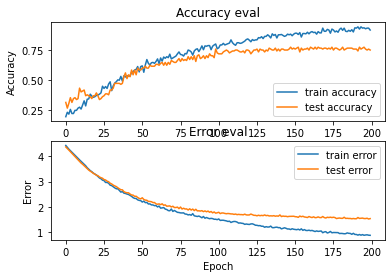

In [111]:
#200

plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

<Figure size 1440x1080 with 0 Axes>

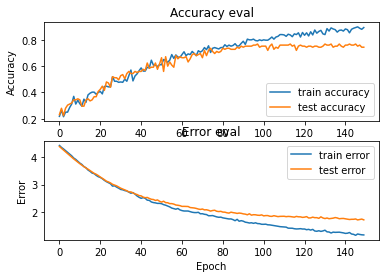

In [115]:
#150

plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

<Figure size 1440x1080 with 0 Axes>

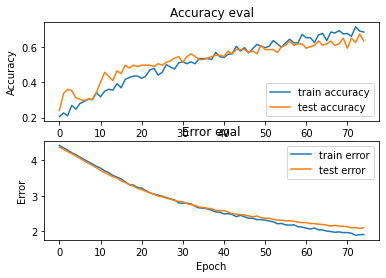

In [118]:
#75

plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

<Figure size 1440x1080 with 0 Axes>

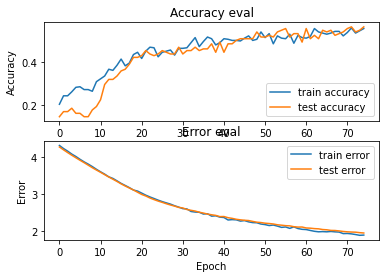

In [131]:
#200  -14

plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

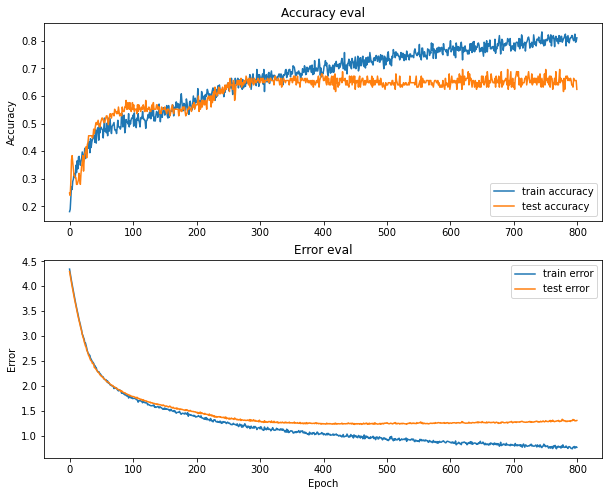

In [48]:
#800 -14
plt.rcParams["figure.figsize"] = (10,8)
# plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

In [80]:
new_model = keras.models.load_model('WavModel.h5')

In [41]:
model.save('WavModel14.h5')